<p style="background-color:#E2ADC3;color:black;font-size:22px;text-align:center;border-radius:10px 9px;font-weight:bold;border:2px solid purple;">Wine Quality Prediction <span style='font-size:29px; background-color:#9D476B ;'>&#127863;</span></p>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df['quality'].isnull().sum()

0

In [7]:
df['quality'].isna().sum()

0

<font size="4">recoding the response variable to two categories as high quality and low quality.</font>

In [8]:
new=[]
for row in df['quality']:
    if (row<=5):
        val=1
    else:
        val=2
    new.append(val)

In [9]:
len(new)

1599

In [10]:
df['newquality']=new

In [11]:
df['newquality'].items()

In [12]:
from collections import Counter
print(sorted(Counter(df['newquality']).items()))

[(1, 744), (2, 855)]


<font size="4">here we can see that dataet is not balanced. to overcome this problem we can use oversampling or undersampling. since low class have small number of observations here I am using oversampling techinque.</font>

In [13]:
df['newquality']

0       1
1       1
2       1
3       2
4       1
       ..
1594    1
1595    2
1596    2
1597    1
1598    2
Name: newquality, Length: 1599, dtype: int64

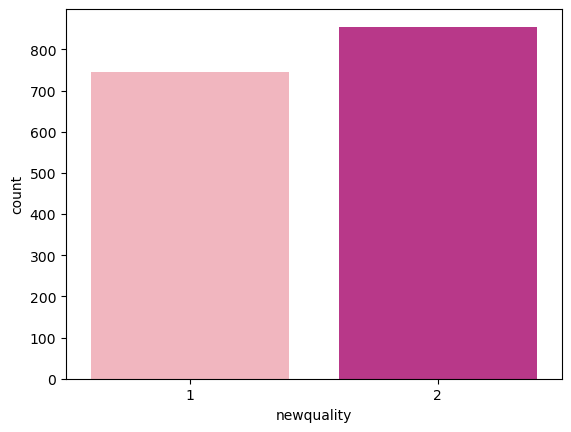

In [14]:
sns.countplot(data=df, x='newquality', palette='RdPu')
plt.show()

<Axes: >

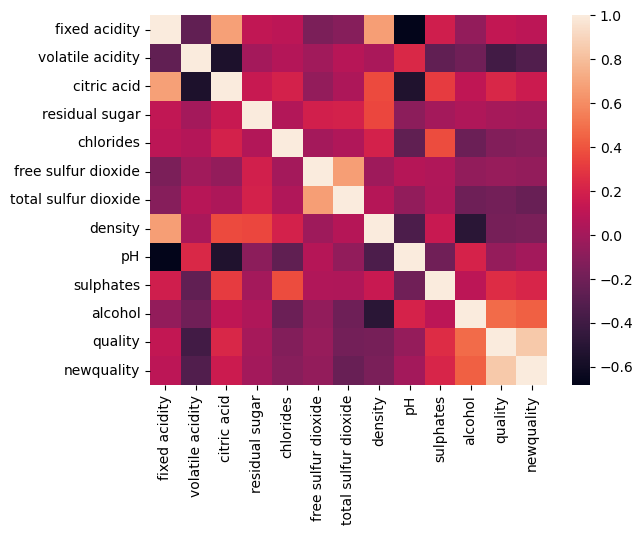

In [15]:
#correaltion map
sns.heatmap(df.corr())

<font size="4">from the correaltion plot we can see there are some highly correlated variables. in this analysis we are looking for prediction accuracy hence those correlations are neglected and also from the background study of red wines you can see that all the variables in this dataset are really important for final quality prediction.</font>

<center><img src="https://media.giphy.com/media/l2Je34w7WkZ84f3os/giphy.gif" style="width:500px;height:300px;"></center>

In [16]:
X=df.drop(['quality','newquality'],axis=1)
y=df['newquality']

In [64]:
#dividing the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train1,x_test,y_train1,y_test=train_test_split(X,y,test_size=0.25, random_state=1234)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


#libraries for model evaluation
from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

<font size="4">stacking classifier gives the highest accuracy which is 85.31%. precision and recall values are also high for this model. hence with SMOTE resampling the best model is stacking classifier with random forest classifier and extra tree classifier.</font>

##  <p style="background-color:#E2ADC3;color:black;font-size:20px;text-align:center;border-radius:10px 10px;border:2px solid purple;"> ✨ models without resampling </p>

<font size="4">now let's see accuracy values without using smote resampling technique</font>

train accuracy: 0.7406171809841534 
 test accuracy: 0.7775


classification report for logistic regression
              precision    recall  f1-score   support

           1       0.78      0.76      0.77       194
           2       0.78      0.80      0.79       206

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



confusion matrix for logistic regression


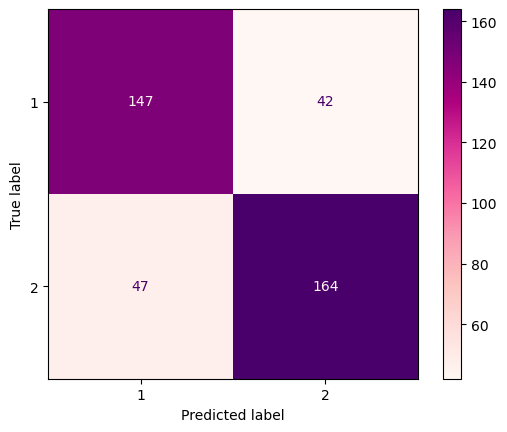

In [65]:
#logistic regression without resampling
lrw = LogisticRegression(max_iter=200000,penalty='l2')
model12=lrw.fit(x_train1, y_train1)
print("train accuracy:",model12.score(x_train1, y_train1),"\n","test accuracy:",model12.score(x_test,y_test))
lrwpred = lrw.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrwpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
# displr = plot_confusion_matrix(lrw, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
ConfusionMatrixDisplay.from_estimator(lrw, x_test, y_test, cmap=plt.cm.RdPu, values_format='d')



train accuracy: 1.0 
 test accuracy: 0.853125


classification report for random forest classifier
              precision    recall  f1-score   support

           1       0.84      0.84      0.84       147
           2       0.87      0.86      0.86       173

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for random forest classifier


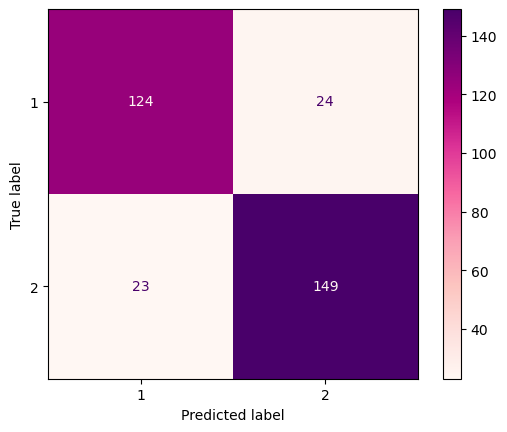

In [20]:
rfw=RandomForestClassifier()
model15=rfw.fit(x_train1, y_train1)
print("train accuracy:",model15.score(x_train1, y_train1),"\n","test accuracy:",model15.score(x_test,y_test))

rfwpred = rfw.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfwpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
# displr = plot_confusion_matrix(rfw, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
ConfusionMatrixDisplay.from_estimator(rfw, x_test, y_test, cmap=plt.cm.RdPu, values_format='d')


##  <p style="background-color:#E2ADC3;color:black;font-size:20px;text-align:center;border-radius:10px 10px;border:2px solid purple;">💎 Results </p>

<font size="4">from the above models stacking classifier and random forest classifier have higher perfromance than other models. <span style="color:red;">stacking classifier</span> is the one with highest accuracy <span style="color:red;">85.94%</span>. We can see that without resampling there is a slight increase in accuracy. hence the model without SMOTE resampling is the best one. The accuracy can be increased by tuning hyper parameters of these models using scikit learn randomized grid search.  </font>

<font size="4"><b>Highly appreciate your questions or feedback related to this notebook. THANK YOU <span style='font-size:22px;'>&#128522;</span></b> </font>




<center><img src="https://media.giphy.com/media/JPgYys8I2ql8sPAFxz/giphy.gif" style="width:500px;height:300px;"></center>